<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/unsupervised_learning/kmeans_intraday_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
!pip install kneed

In [108]:
#!pip install yfinance 

In [109]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [110]:
sc=StandardScaler()

In [111]:
days_out=15

In [112]:
#import yfinance as yf
#df =yf.download('^nsei','2007-01-01')
df=pd.read_csv('/content/nifty_cash_from_aug.csv')
df.columns=['S.no','Date','Open','High','Low','Close','Vol']
dummy = df['Close'].pct_change(days_out).dropna() #  -df['Close'].rolling(window=200).mean()).dropna()
dummy = np.where(abs(dummy)>0.01,dummy,0)
X=sc.fit_transform(dummy.reshape(-1,1))
from sklearn.cluster import KMeans 
from kneed import DataGenerator, KneeLocator

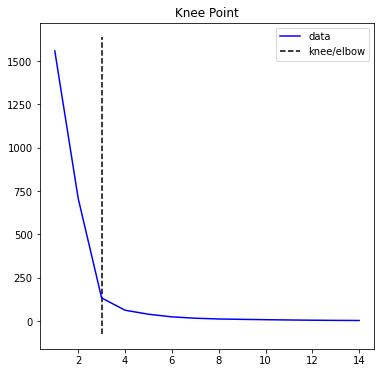

In [113]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
kn = KneeLocator(K, sum_of_squared_distances,S=1.0, curve="convex", direction="decreasing")
kn.plot_knee()
#plt.plot(sum_of_squared_distances)

In [114]:
kn.knee

3

In [115]:
kmeans = KMeans(n_clusters= kn.knee).fit(X.reshape(-1,1))
c = kmeans.predict(X.reshape(-1,1))
minmax = []
for i in range(kn.knee):
    minmax.append([-np.inf,np.inf])
for i in range(len(X)):
    cluster = c[i]
    if X[i] > minmax[cluster][0]:
        minmax[cluster][0] = X[i]
    if X[i] < minmax[cluster][1]:
        minmax[cluster][1] = X[i]

In [116]:
pd.Series(c).to_csv('cluster5.csv')

In [117]:
minmax

[[array([-0.03898694]), array([-0.03898694])],
 [array([-1.33362531]), array([-4.67309318])],
 [array([3.69560977]), array([1.25747841])]]

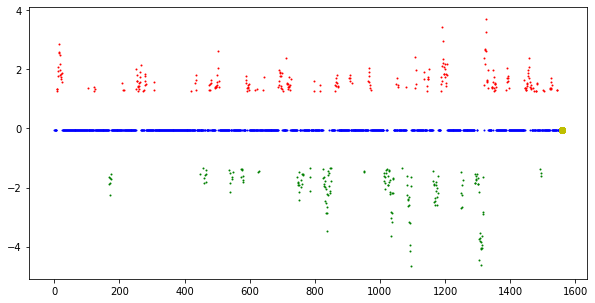

In [118]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
for i in range(len(X[:])):
    colors = ['b','g','r','c','y']
    c = kmeans.predict(X[i].reshape(-1,1))[0]
    color = colors[c]
    plt.scatter(i,X[i],c = color,s = 1)
    plt.scatter(len(X)-1,X[len(X)-1],c='y')

In [119]:
df_new=df[-1500:].copy()
X_new=X[-1500:]

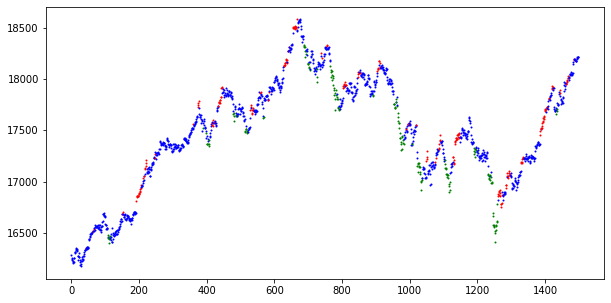

In [120]:
plt.figure(figsize=(10,5))
for i in range(len(df_new)):
    colors = ['b','g','r','c','y']
    c = kmeans.predict(X_new[i].reshape(-1,1))[0]
    color = colors[c]
    plt.scatter(i,df_new['Close'].iloc[i],c = color,s = 1)
plt.savefig('cluster_strangle.png')  

In [121]:
c

0

In [122]:
sc.inverse_transform(X[[-1]])

array([[0.]])

In [123]:
'''    
for i in range(len(minmax)):
    plt.hlines(minmax[i][0],xmin = 0,xmax = len(X),colors = 'g')
    plt.hlines(minmax[i][1],xmin = 0,xmax = len(X),colors = 'r')
'''    

"    \nfor i in range(len(minmax)):\n    plt.hlines(minmax[i][0],xmin = 0,xmax = len(X),colors = 'g')\n    plt.hlines(minmax[i][1],xmin = 0,xmax = len(X),colors = 'r')\n"